In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import mlxtend    ## Visualise the result neatly and intuitively
sns.set()

from sklearn.model_selection import train_test_split     ## Splitting the train and test data
from sklearn.neighbors import KNeighborsClassifier     ## KNN model
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay         ## Accuracy of the KNN model
from sklearn.model_selection import GridSearchCV      ## Helps in finding the best k value

## uses cross-validation, basically splitting the training data into training set and validation set
## And then finetune the parameters in the validation set by reiterating and getting the best model eventually
## Fine tuned model, is then tested on the test data

from mlxtend.plotting import plot_decision_regions          ## Defining the boundaries for the classes
import time



In [2]:
## Generate a dataset

from sklearn.datasets import make_blobs   ## normally distributed points around a specified center

In [3]:
inputs, target = make_blobs(n_samples = 1000, centers = [(-3, 3), (0, 0), (2, 2)], random_state = 365)

In [4]:
inputs.shape, target.shape    ## X, Y in inputs    and    target contains the labels of each data point

((1000, 2), (1000,))

In [5]:
df = pd.DataFrame(data = inputs, columns = ['Feature 1', 'Feature 2'])
df['Target'] = target

In [6]:
df.head()

,Feature 1,Feature 2,Target
0,1.630460,2.094029,2
1,-2.811252,3.852241,0
2,0.501051,1.582531,2
3,-3.624112,3.325318,0
4,-3.278106,2.359416,0


<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

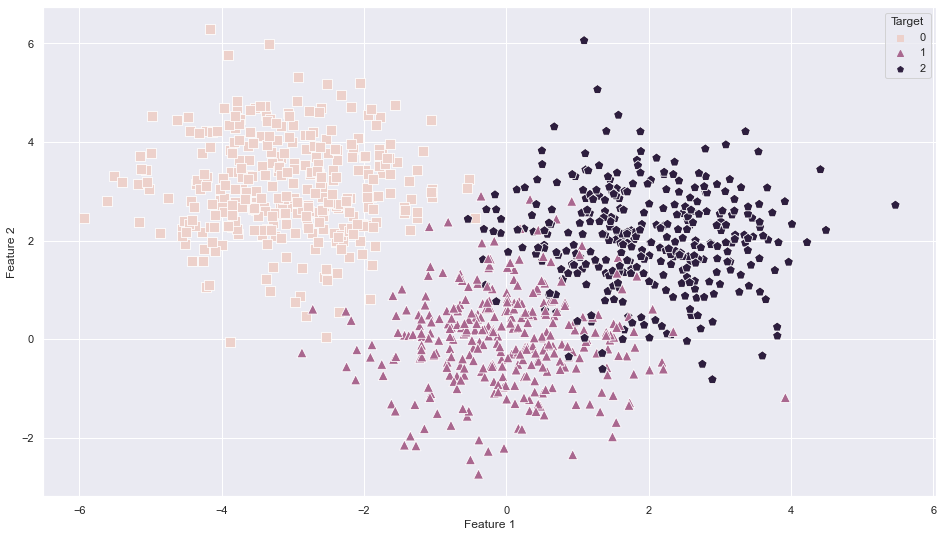

In [7]:
sns.set()
plt.figure(figsize = (16, 9))
sns.scatterplot(x = df['Feature 1'], y = df['Feature 2'], hue = df['Target'], markers = [',', '^', 'p'], 
               style = df['Target'], s = 100)

<Figure size 1440x648 with 0 Axes>

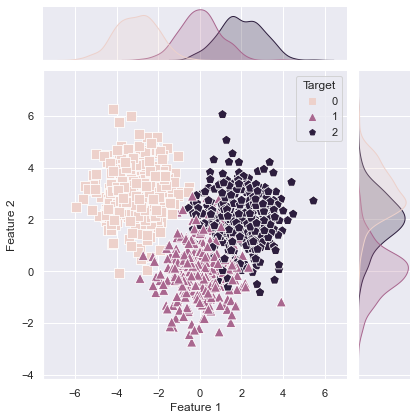

In [8]:
sns.set()
plt.figure(figsize = (20, 9))
sns.jointplot(x = df['Feature 1'], y = df['Feature 2'], hue = df['Target'], markers = [',', '^', 'p'], 
               style = df['Target'], s = 100)

# Train-Test-Split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state =  365,
                                                   stratify= target)
## So that we have equal proportion of the target classes in the test and training data

# Creating the model

In [10]:
clf = KNeighborsClassifier(n_neighbors = 30, weights = 'uniform')  ## By default the weight is index, basically the neighbor 
# with lower index gets priority, but we want the priority on the basis of distance (Euclidean)

# So, we change the class_weights to 'distance', where weight becomes, weight = 1/ distance
# Higher the distance lower is the weight given to that class and vice versa

In [11]:
clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=30)

# Predicting a Sample

In [12]:
feature_1 = -0.18
feature_2 = 3.2

In [13]:
clf.predict([[feature_1, feature_2]])   # Stored inside the list
## Predicting the class, ## Now class 2 got the preference, since we changed the weight of the KNN model

array([2])

In [14]:
## Goal: Create a Scatter Plot of the training data
# Put point O at in the coordinate system and draw the circle around the nearest neighbour

In [15]:
neighbors = clf.kneighbors([[feature_1, feature_2]])
neighbors      ## Euclidean distance (from O to nearest neighbour) and 
                # index of the nearest neighbour to O in the training dataset 

(array([[0.27086818, 0.34749744, 0.40387913, 0.45668128, 0.57370524,
         0.58002987, 0.6147827 , 0.62680551, 0.76674656, 0.77233172,
         0.78175021, 0.84541382, 0.8741025 , 0.8769993 , 0.89014688,
         0.91521046, 0.92223527, 0.99986243, 1.01649367, 1.0231371 ,
         1.03996308, 1.04075309, 1.05202214, 1.05586882, 1.10512231,
         1.14601178, 1.15303035, 1.16564948, 1.16938942, 1.16964811]]),
 array([[336, 215, 679, 221, 690, 688, 269, 309, 543, 100,  79, 161, 708,
         613, 216, 291, 561, 748, 516, 140, 514, 399,  25, 255, 431,   0,
         386, 458,   3, 304]]))

# Visualising the neighbors

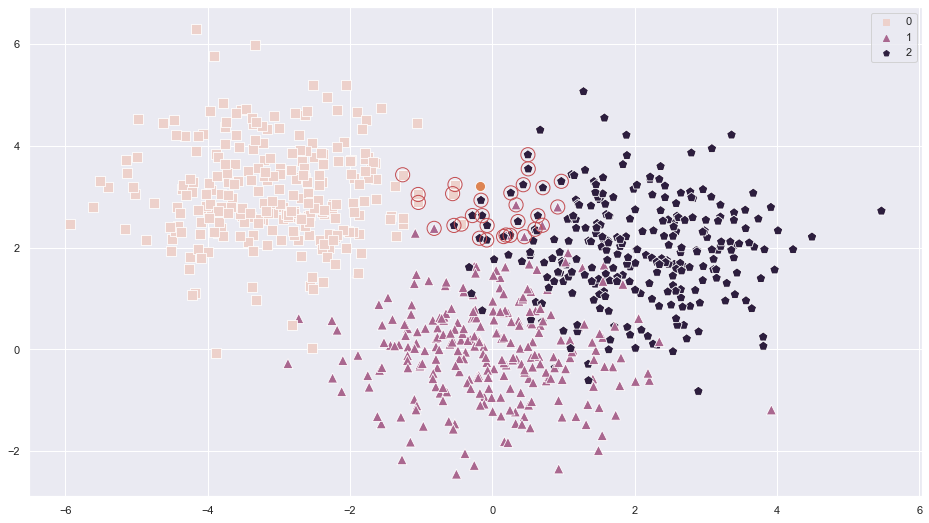

In [16]:
sns.set()
plt.figure(figsize = (16, 9))

sns.scatterplot(x = x_train[:, 0], y = x_train[:, 1],
               hue = y_train, markers = [',', '^', 'p'],
               style = y_train, s = 100, legend = True)

sns.scatterplot(x = [feature_1], y = [feature_2], style = [feature_2], markers = ['o'], s = 100, 
               legend = False)

plot_x_train = []
plot_y_train = []

for i in neighbors[1]:
    plot_x_train.append(x_train[i, 0])
    plot_y_train.append(x_train[i, 1])
    
plt.scatter(plot_x_train, plot_y_train, s = 200, facecolors = 'none', edgecolors = 'r')

In the above visualisation, it can be clearly seen that the circle is nearer to pentagon than the square, but still it is assigned to the square. Why?

# Getting parameters of the model

In [17]:
clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 30,
 'p': 2,
 'weights': 'uniform'}

The index value is smaller for square. It is based on index for now. We have changed it into weights.

# Drawing Decision Regions

In [18]:
x_train.shape

(800, 2)

Time elapsed: 12.7 seconds


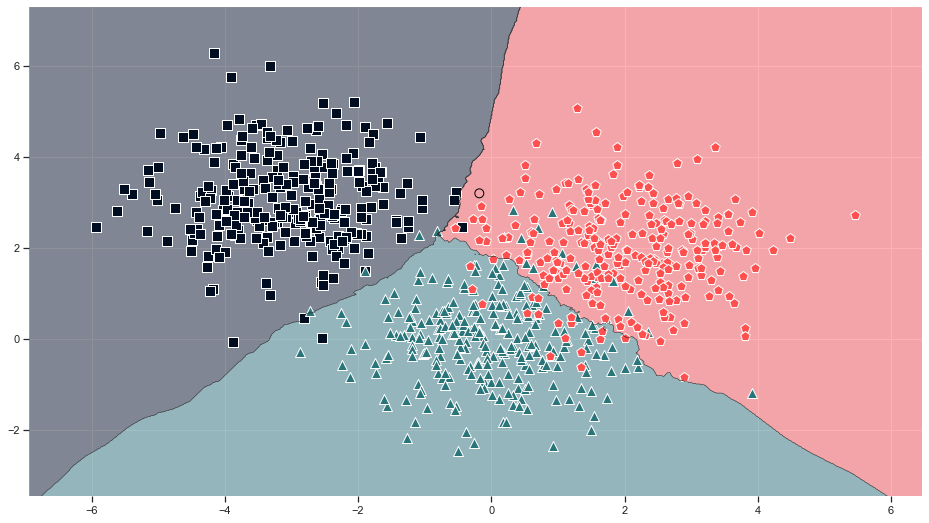

In [19]:
start = time.time()

plt.figure(figsize = (16, 9))

plot_decision_regions(X = x_train, y = y_train, X_highlight = np.array([[feature_1, feature_2]]), clf = clf,
                     markers = [',', '^', 'p'], colors = '#000c1f,#29757a,#ff5050',
                     scatter_kwargs= {'s': 100, 'edgecolor': 'white', 'alpha': 1},
                     legend = False)

end = time.time()

print(f'Time elapsed: {round(end - start, 1)} seconds')

$$\underline{\textbf{Inferences}}$$

* Smaller value of k = 1    (Overfitting)
 * Rarely a good choice
 * Sensitive to changes in the training data
 * Likely to overfit
 * Poor performance on new datasets
 * Low Bias, High Variance


* Too high value of k = 30    (Underfitting)
 * Smoother decision boundaries
 * Not affected by bakground noise
 * Not affected by new data points
 * Tendency to misclassify points
 * Low Variance, High Bias

# Determining the Value of k

## Getting the error rates of a set of models

In [20]:
error_uniform = []
error_distance = []

k_range = range(1, 51)

for k in k_range:
    clf = KNeighborsClassifier(n_neighbors=k, weights = 'uniform')
    clf.fit(x_train, y_train)
    predictions = clf.predict(x_test)
    error_uniform.append(1 - accuracy_score(y_test, predictions))
    
    clf = KNeighborsClassifier(n_neighbors=k, weights = 'distance')
    clf.fit(x_train, y_train)
    predictions = clf.predict(x_test)
    error_distance.append(1 - accuracy_score(y_test, predictions))

Text(0, 0.5, 'Error Rate')

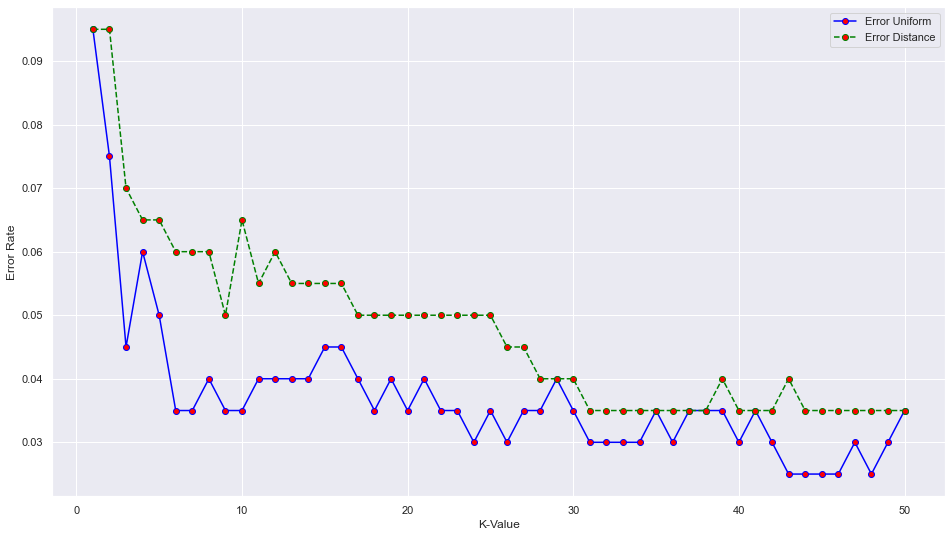

In [21]:
plt.figure(figsize = (16, 9))

plt.plot(k_range, error_uniform, c = 'blue', linestyle = 'solid', marker = 'o', markerfacecolor = 'red',
        label = 'Error Uniform')

plt.plot(k_range, error_distance, c = 'green', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red',
        label = 'Error Distance')

plt.legend()

plt.xlabel('K-Value')
plt.ylabel('Error Rate')

From above, we can see that the 'Uniform' weights gives us a better model as the error is less when compared to 'distance' weight. So, we will choose 'uniform' as our weight. 

But how do we find the appropriate value of k? For this we use, GridSearchCV

## Choosing a set of parameters to set

In [22]:
parameters = {'n_neighbors': range(1, 51), 'weights': ['uniform', 'distance']}

## Create an instance of the GridSearchCV class 

In [23]:
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = parameters,
                          scoring = 'accuracy')

In [24]:
grid_search.fit(x_train, y_train)

## Fits the model to each possible combination of n_neighbours and weights (50 * 2 = 100 models)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 51),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [25]:
grid_search.best_params_

{'n_neighbors': 10, 'weights': 'uniform'}

In [26]:
clf = grid_search.best_estimator_

## We have created an instance of the best estimator model

In [27]:
grid_search.best_score_   ## Mean of all accuracies observed during cross-validation

0.9512499999999999

## Making predictions on the test data

In [32]:
y_test_pred = clf.predict(x_test)   ## Using the best estimator model on test data
y_test_pred.shape


(200,)

## Construct the Confusion matrix

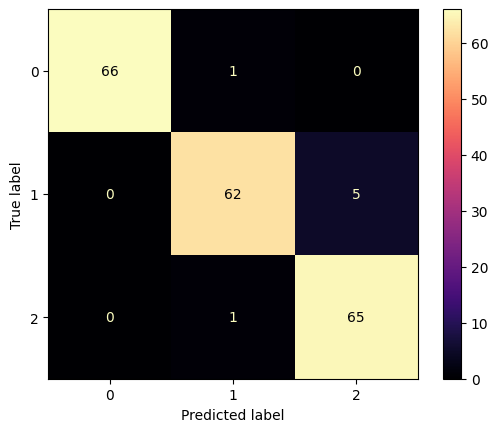

In [29]:
sns.reset_orig()

ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, labels = clf.classes_,
                                       cmap = 'magma')

The diagonals are very well, which means the model has predicted well.

## Getting the Classification Report

In [30]:
print(classification_report(y_test, y_test_pred, target_names= ['0', '1', '2']))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        67
           1       0.97      0.93      0.95        67
           2       0.93      0.98      0.96        66

    accuracy                           0.96       200
   macro avg       0.97      0.97      0.96       200
weighted avg       0.97      0.96      0.97       200

